In [7]:
import  statsmodels
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as web
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pip install PyPortfolioOpt

In [10]:
indian_stock_list=['ACC.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ALKEM.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BANDHANBNK.NS', 'BATAINDIA.NS', 'BERGEPAINT.NS', 'BHARATFORGE.NS', 'BHARTIAIRTEL.NS', 'BPCL.NS', 'CADILAHC.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COFORGE.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'DABUR.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'GRASIM.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'IDEA.NS', 'IGL.NS', 'INDHOTEL.NS', 'INDUSINDBK.NS', 'INFOSYS.NS', 'INFY.NS', 'IRCTC.NS', 'ITC.NS', 'JUBLFOOD.NS', 'KOTAKBANK.NS', 'L&TFH.NS', 'LTTS.NS', 'LUPIN.NS', 'M&M.NS', 'MARUTI.NS', 'MCDOWELL-N.NS', 'MFSL.NS', 'MGL.NS', 'MPHASIS.NS', 'MRF.NS', 'MUTHOOTFIN.NS', 'NIFTYBEES.NS', 'NTPC.NS', 'ONGC.NS', 'PAGEIND.NS', 'PEL.NS']
print('indian_stock_list:', indian_stock_list)
data_1 = yf.download(indian_stock_list, start="2013-01-01", end="2023-06-18")['Adj Close']
print('data fields downloaded:', set(data_1.columns.get_level_values(0)))


indian_stock_list: ['ACC.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ALKEM.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BANDHANBNK.NS', 'BATAINDIA.NS', 'BERGEPAINT.NS', 'BHARATFORGE.NS', 'BHARTIAIRTEL.NS', 'BPCL.NS', 'CADILAHC.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COFORGE.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'DABUR.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'GRASIM.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'IDEA.NS', 'IGL.NS', 'INDHOTEL.NS', 'INDUSINDBK.NS', 'INFOSYS.NS', 'INFY.NS', 'IRCTC.NS', 'ITC.NS', 'JUBLFOOD.NS', 'KOTAKBANK.NS', 'L&TFH.NS', 'LTTS.NS', 'LUPIN.NS', 'M&M.NS', 'MARUTI.NS', 'MCDOWELL-N.NS', 'MFSL.NS', 'MGL.NS', 'MPHASIS.NS', 'MRF.NS', 'MUTHOOTFIN.NS', 'NIFTYBEES.NS', 'NTPC.NS', 'ONGC.NS', 'PAGEIND.NS', 'PEL.NS']
[*********************100%%**********************]  64 of 64 completed

ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['INFOSYS.NS', 'BHARTIAIRTEL.NS', 'CADILAHC.NS', 'BHARATFORGE.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



data fields downloaded: {'M&M.NS', 'ICICIBANK.NS', 'ADANIPORTS.NS', 'AUROPHARMA.NS', 'ICICIGI.NS', 'EXIDEIND.NS', 'IGL.NS', 'MUTHOOTFIN.NS', 'HINDUNILVR.NS', 'INFOSYS.NS', 'LUPIN.NS', 'DIVISLAB.NS', 'BAJFINANCE.NS', 'BANDHANBNK.NS', 'MPHASIS.NS', 'NTPC.NS', 'COALINDIA.NS', 'ALKEM.NS', 'BHARTIAIRTEL.NS', 'ICICIPRULI.NS', 'DABUR.NS', 'CADILAHC.NS', 'AXISBANK.NS', 'HDFCLIFE.NS', 'ITC.NS', 'JUBLFOOD.NS', 'MCDOWELL-N.NS', 'BAJAJFINSV.NS', 'BERGEPAINT.NS', 'MRF.NS', 'NIFTYBEES.NS', 'DRREDDY.NS', 'ESCORTS.NS', 'INDUSINDBK.NS', 'IRCTC.NS', 'BPCL.NS', 'IDEA.NS', 'BATAINDIA.NS', 'CONCOR.NS', 'MFSL.NS', 'CIPLA.NS', 'FEDERALBNK.NS', 'MGL.NS', 'AUBANK.NS', 'L&TFH.NS', 'ONGC.NS', 'INFY.NS', 'INDHOTEL.NS', 'KOTAKBANK.NS', 'BHARATFORGE.NS', 'PAGEIND.NS', 'LTTS.NS', 'MARUTI.NS', 'BALKRISIND.NS', 'CUMMINSIND.NS', 'PEL.NS', 'ACC.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'HINDPETRO.NS', 'HDFCBANK.NS', 'GRASIM.NS', 'COFORGE.NS', 'ADANIPOWER.NS'}


In [11]:
# Check for missing values
missing_data = data_1.isnull().sum()
if missing_data.any():
    # You can either drop rows with missing values or fill them as appropriate for your analysis.
    data = data_1.dropna()


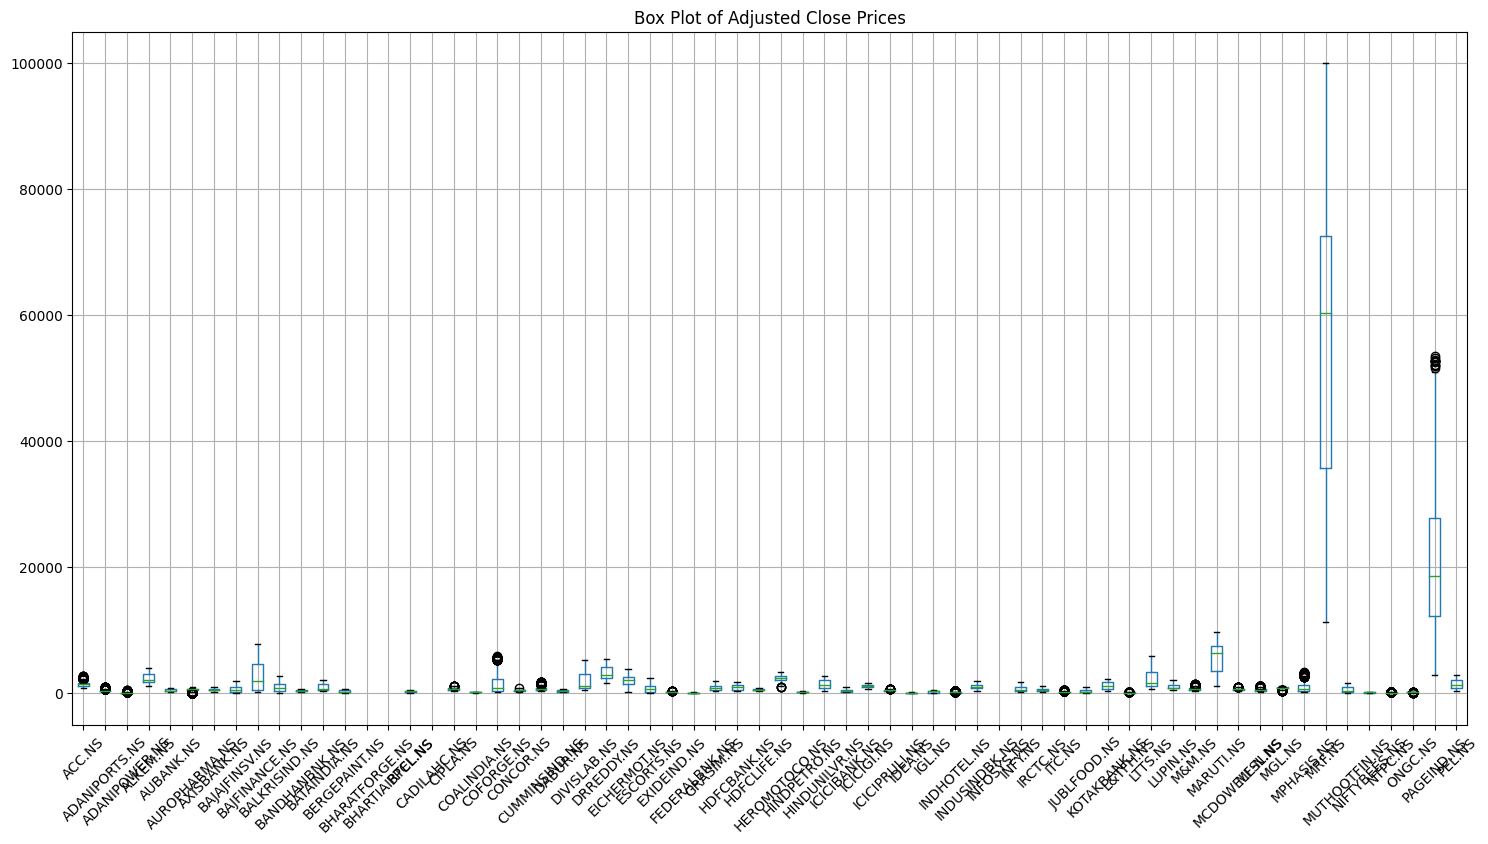

In [9]:
# Create a box plot to visualize data distribution
plt.figure(figsize=(18, 9))
data_1.boxplot()
plt.title('Box Plot of Adjusted Close Prices')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data_1.head(5)

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the list of Indian stock tickers
indian_stock_list = ['ACC.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'ALKEM.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AXISBANK.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BANDHANBNK.NS', 'BATAINDIA.NS', 'BERGEPAINT.NS', 'BHARATFORGE.NS', 'BHARTIAIRTEL.NS', 'BPCL.NS', 'CADILAHC.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COFORGE.NS', 'CONCOR.NS', 'CUMMINSIND.NS', 'DABUR.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'FEDERALBNK.NS', 'GRASIM.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'IDEA.NS', 'IGL.NS', 'INDHOTEL.NS', 'INDUSINDBK.NS', 'INFOSYS.NS', 'INFY.NS', 'IRCTC.NS', 'ITC.NS', 'JUBLFOOD.NS', 'KOTAKBANK.NS', 'L&TFH.NS', 'LTTS.NS', 'LUPIN.NS', 'M&M.NS', 'MARUTI.NS', 'MCDOWELL-N.NS', 'MFSL.NS', 'MGL.NS', 'MPHASIS.NS', 'MRF.NS', 'MUTHOOTFIN.NS', 'NIFTYBEES.NS', 'NTPC.NS', 'ONGC.NS', 'PAGEIND.NS', 'PEL.NS']

# Download the adjusted closing prices
data = yf.download(indian_stock_list, start="2013-01-01", end="2023-06-18")['Adj Close']

# Normalize the data to start at 1.0
normalized_data = data / data.iloc[0]

# Plot the normalized prices for all stocks
plt.figure(figsize=(12, 6))
for stock in indian_stock_list:
    plt.plot(normalized_data.index, normalized_data[stock], label=stock)

plt.title("Normalized Prices for All Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(loc="upper left", fontsize='small', ncol=2)
plt.grid(True)
plt.show()


Summary Statistics:
            ACC.NS  ADANIPORTS.NS  ADANIPOWER.NS     ALKEM.NS    AUBANK.NS  \
count  2581.000000    2581.000000    2581.000000  1849.000000  1468.000000   
mean   1467.872820     392.223971      74.653603  2307.048267   446.331749   
std     395.671954     205.465934      81.429754   721.588347   148.307043   
min     789.846313     115.781723      15.450000  1111.189087   189.661850   
25%    1204.380371     257.815369      32.000000  1725.096802   319.649025   
50%    1370.999268     344.485199      44.000000  2039.972290   394.378418   
75%    1610.630859     415.165161      62.950001  2993.043213   593.460052   
max    2719.849854     963.770874     432.500000  3915.111816   789.360291   

       AUROPHARMA.NS  AXISBANK.NS  BAJAJFINSV.NS  BAJFINANCE.NS  \
count    2581.000000  2581.000000    2581.000000    2581.000000   
mean      580.385551   552.968211     625.787096    2649.341910   
std       219.005364   182.828810     518.798087    2408.605149   
min      

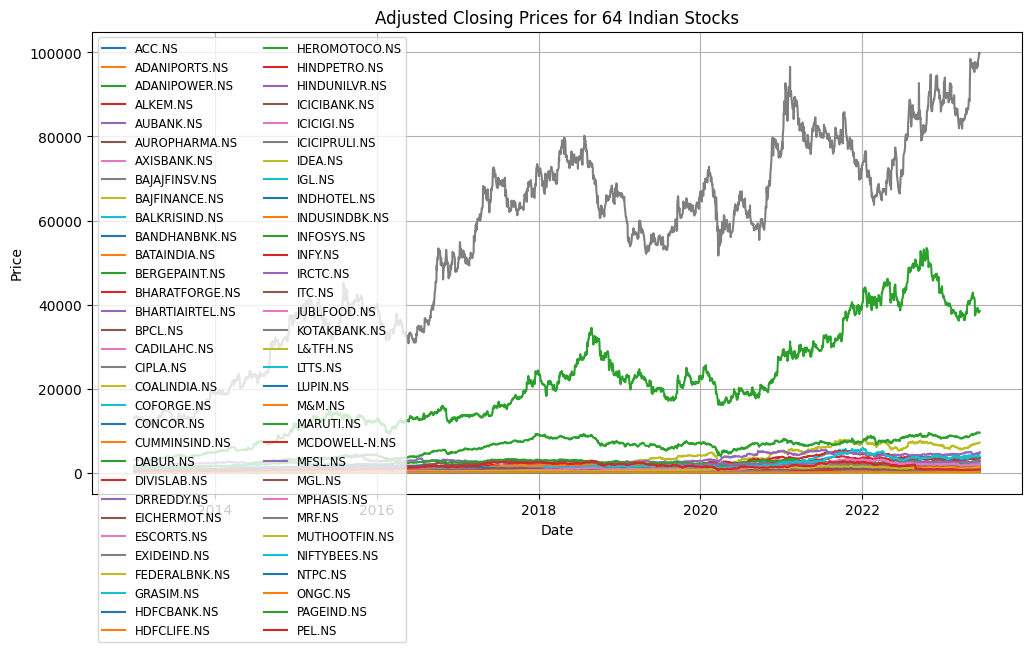

NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Summary Statistics
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

# Daily Returns Line Charts
plt.figure(figsize=(12, 6))
for stock in indian_stock_list:
    plt.plot(data.index, daily_returns[stock], label=stock)
plt.title("Daily Returns for 64 Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(loc="upper left", fontsize='small', ncol=2)
plt.grid(True)
plt.show()

# Cumulative Returns Line Charts
plt.figure(figsize=(12, 6))
for stock in indian_stock_list:
    plt.plot(data.index, cumulative_returns[stock], label=stock)
plt.title("Cumulative Returns for 64 Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(loc="upper left", fontsize='small', ncol=2)
plt.grid(True)
plt.show()

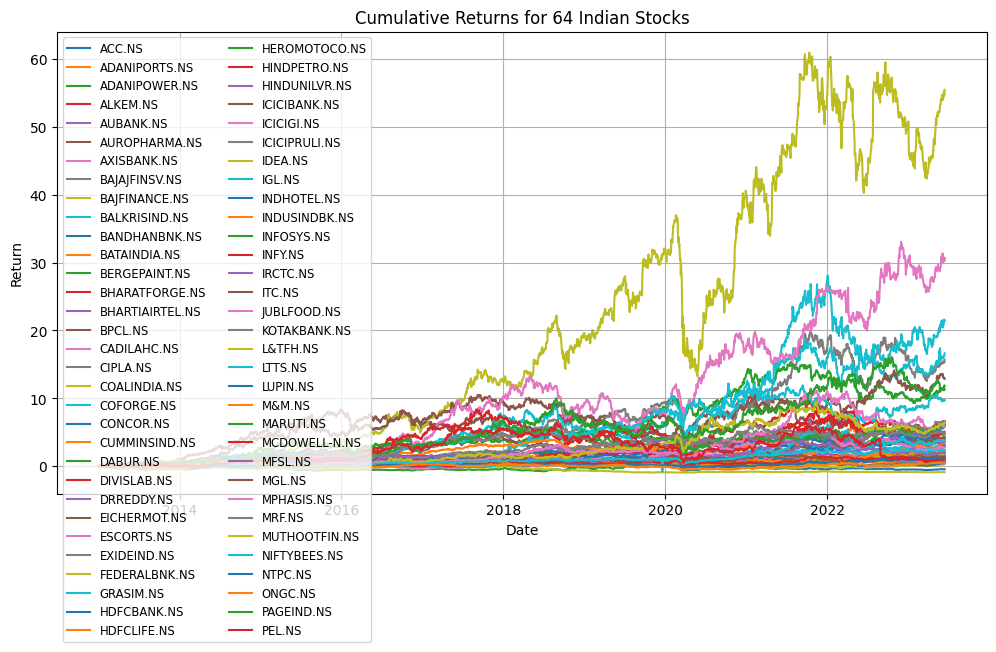

In [ ]:
# Cumulative Returns Line Charts
plt.figure(figsize=(12, 6))
for stock in indian_stock_list:
    plt.plot(data.index, cumulative_returns[stock], label=stock)
plt.title("Cumulative Returns for 64 Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(loc="upper left", fontsize='small', ncol=2)
plt.grid(True)
plt.show()

In [ ]:
# Daily Returns Analysis
daily_returns = data.pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1

In [ ]:
# Line Charts for All Stocks
plt.figure(figsize=(12, 6))
for stock in indian_stock_list:
    plt.plot(data.index, data[stock], label=stock)
plt.title("Adjusted Closing Prices for 64 Indian Stocks")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left", fontsize='small', ncol=2)
plt.grid(True)
plt.show()

In [ ]:
# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for 64 Indian Stocks")
plt.show()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
threshold = 3 # Adjust the threshold as needed

outliers = np.where(z_scores > threshold)
outlier_indices = list(zip(*outliers))

print("Outlier indices:", outlier_indices)


Outlier indices: []


In [18]:
# Define the threshold for outlier removal
threshold = 3  # Adjust the threshold as needed

# Compute Z-scores
z_scores = np.abs(stats.zscore(data_1))

# Create a mask to identify outliers
outlier_mask = z_scores > threshold

# Remove outliers from the DataFrame
data_no_outliers = data[~outlier_mask.any(axis=1)]

# You can also get the outliers as a separate DataFrame
outliers = data[outlier_mask.any(axis=1)]


<ipython-input-18-010760b40bb4>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outliers = data[~outlier_mask.any(axis=1)]
<ipython-input-18-010760b40bb4>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = data[outlier_mask.any(axis=1)]


In [12]:
from scipy import stats

z_scores = np.abs(stats.zscore(data_1))
threshold = 3  # Adjust the threshold as needed

outliers = np.where(z_scores > threshold)
outlier_indices = list(zip(*outliers))

print("Outlier indices:", outlier_indices)


Outlier indices: []


In [19]:
print(outliers)

Empty DataFrame
Columns: [ACC.NS, ADANIPORTS.NS, ADANIPOWER.NS, ALKEM.NS, AUBANK.NS, AUROPHARMA.NS, AXISBANK.NS, BAJAJFINSV.NS, BAJFINANCE.NS, BALKRISIND.NS, BANDHANBNK.NS, BATAINDIA.NS, BERGEPAINT.NS, BHARATFORGE.NS, BHARTIAIRTEL.NS, BPCL.NS, CADILAHC.NS, CIPLA.NS, COALINDIA.NS, COFORGE.NS, CONCOR.NS, CUMMINSIND.NS, DABUR.NS, DIVISLAB.NS, DRREDDY.NS, EICHERMOT.NS, ESCORTS.NS, EXIDEIND.NS, FEDERALBNK.NS, GRASIM.NS, HDFCBANK.NS, HDFCLIFE.NS, HEROMOTOCO.NS, HINDPETRO.NS, HINDUNILVR.NS, ICICIBANK.NS, ICICIGI.NS, ICICIPRULI.NS, IDEA.NS, IGL.NS, INDHOTEL.NS, INDUSINDBK.NS, INFOSYS.NS, INFY.NS, IRCTC.NS, ITC.NS, JUBLFOOD.NS, KOTAKBANK.NS, L&TFH.NS, LTTS.NS, LUPIN.NS, M&M.NS, MARUTI.NS, MCDOWELL-N.NS, MFSL.NS, MGL.NS, MPHASIS.NS, MRF.NS, MUTHOOTFIN.NS, NIFTYBEES.NS, NTPC.NS, ONGC.NS, PAGEIND.NS, PEL.NS]
Index: []

[0 rows x 64 columns]


In [ ]:
data_1.rolling(63).mean().plot(figsize=(10, 5), ylabel='Price in Rs', fontsize=13)

In [ ]:
mu = expected_returns.mean_historical_return(data_1)
S = risk_models.sample_cov(data_1)

In [ ]:
#optimize the maximum sharp ratio
arr = np.random.random(64)
arr

array([0.84446933, 0.35124354, 0.24227581, 0.11393813, 0.34267109,
       0.49212431, 0.84886183, 0.99084697, 0.61025808, 0.35107473,
       0.14048749, 0.1320611 , 0.56814933, 0.54372311, 0.61635762,
       0.81165512, 0.466498  , 0.53075413, 0.42265924, 0.14141255,
       0.16591901, 0.80390762, 0.14493906, 0.40110271, 0.36264145,
       0.97199042, 0.79296533, 0.93716748, 0.92926451, 0.33473773,
       0.64825777, 0.21157566, 0.94717766, 0.74520636, 0.57631611,
       0.11964203, 0.35955401, 0.48503451, 0.09138166, 0.67379287,
       0.70010497, 0.00548069, 0.91971424, 0.94528529, 0.13255683,
       0.36299454, 0.47085049, 0.51317254, 0.29867603, 0.65774363,
       0.59597242, 0.93073252, 0.41421852, 0.89935677, 0.46812892,
       0.16666837, 0.55813954, 0.7152801 , 0.15751362, 0.17967405,
       0.0402728 , 0.88251968, 0.90225595, 0.4764401 ])

In [ ]:
import numpy as np

# Example correlation matrix (replace with your actual data)
correlation_matrix = np.random.rand(64, 64)  # Replace with your actual data

# Transform correlation matrix into a covariance matrix
volatility = np.random.rand(64)  # Example volatilities
covariance_matrix = np.outer(volatility, volatility) * correlation_matrix

# Now, you can use covariance_matrix for portfolio optimization.


In [ ]:
arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7] + arr[8] + arr[9] + arr[10] + arr[11] + arr[12] + arr[13] + arr[14] + arr[15] + arr[16] + arr[17] + arr[18] + arr[19] + arr[20] + arr[21] + arr[22] + arr[23] + arr[24] + arr[25] + arr[26] + arr[27] + arr[28] + arr[29] + arr[30] + arr[31] + arr[32] + arr[33] + arr[34] + arr[35] + arr[36] + arr[37] + arr[38] + arr[39] + arr[40] + arr[41] + arr[42] + arr[43] + arr[44] + arr[45] + arr[46] + arr[47] + arr[48] + arr[49] + arr[50] + arr[51] + arr[52] + arr[53] + arr[54] + arr[55] + arr[56] + arr[57] + arr[58] + arr[59] + arr[60] + arr[61] + arr[62] + arr[63]


30.972900672407988

In [ ]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

NameError: ignored

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

In [ ]:
portfolio_value=100000

In [ ]:
total_portfolio_value=portfolio_value

In [ ]:
latest_prices=get_latest_prices(data_1)

In [ ]:
latest_prices = get_latest_prices(data_1)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: Rs.{:.2f}".format(leftover))

NameError: ignored